In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
import matplotlib.pyplot as plt

In [4]:
dataset_path = r'C:\Users\Hp\Downloads\VW_AI\dataset'
img_size = (128, 128)
batch_size = 32

In [15]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=40,  # Increased rotation range
    width_shift_range=0.2,  # Increased width shift range
    height_shift_range=0.2,  # Increased height shift range
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    dataset_path + '\\train\\',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 8 images belonging to 2 classes.


In [16]:
val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
    dataset_path + '\\validation\\',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 8 images belonging to 2 classes.


In [17]:
# Build the enhanced CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2, activation='softmax'))

In [18]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=15,
    validation_data=val_generator,
    validation_steps=len(val_generator),
    batch_size=16  # Adjust the batch size
)

Epoch 1/15
1/1 [==============================] - 2s 2s/step - loss: 0.4999 - accuracy: 0.7500 - val_loss: 0.8201 - val_accuracy: 0.5000
Epoch 2/15
1/1 [==============================] - 0s 460ms/step - loss: 0.1766 - accuracy: 0.8750 - val_loss: 0.9595 - val_accuracy: 0.5000
Epoch 3/15
1/1 [==============================] - 0s 435ms/step - loss: 0.4910 - accuracy: 0.8750 - val_loss: 1.2209 - val_accuracy: 0.5000
Epoch 4/15
1/1 [==============================] - 0s 433ms/step - loss: 1.3929 - accuracy: 0.5000 - val_loss: 1.7255 - val_accuracy: 0.5000
Epoch 5/15
1/1 [==============================] - 0s 470ms/step - loss: 0.6758 - accuracy: 0.7500 - val_loss: 2.1900 - val_accuracy: 0.5000
Epoch 6/15
1/1 [==============================] - 1s 553ms/step - loss: 1.5717 - accuracy: 0.8750 - val_loss: 2.4293 - val_accuracy: 0.5000
Epoch 7/15
1/1 [==============================] - 0s 452ms/step - loss: 0.8776 - accuracy: 0.7500 - val_loss: 2.5813 - val_accuracy: 0.5000
Epoch 8/15
1/1 [=======

In [20]:
model.evaluate(val_generator)

1/1 [==============================] - 0s 172ms/step - loss: 3.6193 - accuracy: 0.5000


[3.6193299293518066, 0.5]

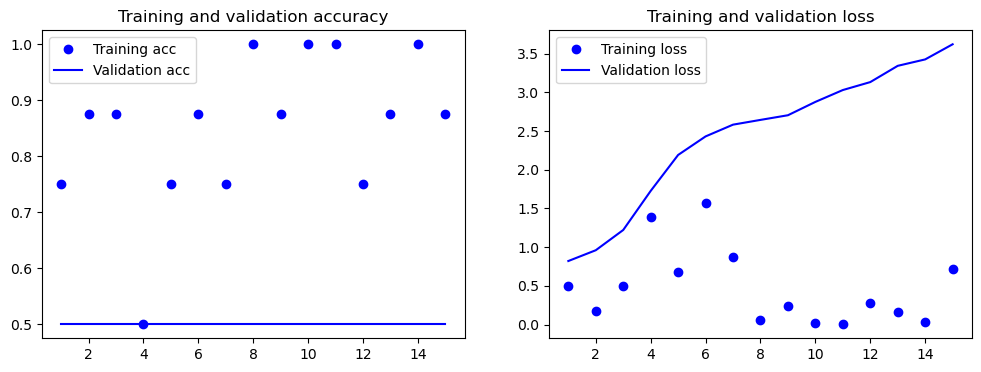

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 126, 126, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 61, 61, 64)        256       
 chNormalization)                                                
                                                      

In [23]:
test_loss, test_accuracy = model.evaluate(val_generator)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

1/1 [==============================] - 0s 169ms/step - loss: 3.6193 - accuracy: 0.5000
Test Accuracy: 50.00%
